### Decision Tree Regressor

_Trimming branches smartly with cost-complexity pruning_

Decision Trees aren’t limited to categorizing data — they’re equally good at predicting numerical values! Classification trees often steal the spotlight, but **Decision Tree Regressors** (or **Regression Trees**) are powerful and versatile tools in the world of continuous variable prediction.

A **_Decision Tree_** for regression is a model that predicts numerical values using a tree-like structure. It splits data based on key features, starting from a root question and branching out. Each node asks about a feature, dividing data further until reaching leaf nodes with final predictions. To get a result, you follow the path matching your data’s features from root to leaf.

#### Dataset Used

The standard dataset is used to predict the number of golfers visiting on a given day and includes variables like weather outlook, temperature, humidity, and wind conditions.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temp.': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humid.': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52, 39, 43, 37, 28, 19, 43, 47, 56, 33, 49, 23, 42, 13, 33, 29, 25, 51, 41, 14, 34, 29, 49, 36, 57, 21, 23, 41]
}

df = pd.DataFrame(dataset_dict)

# One-hot encode 'Outlook' column
df = pd.get_dummies(df, columns=['Outlook'],prefix='',prefix_sep='')

# Convert 'Wind' column to binary
df['Wind'] = df['Wind'].astype(int)

# Split data into features and target, then into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

#### Correlation Matrix (Heatmap)

To understand how the features are correlated with each other and with the target variable (`Num_Players`). This is particularly helpful for numerical features.

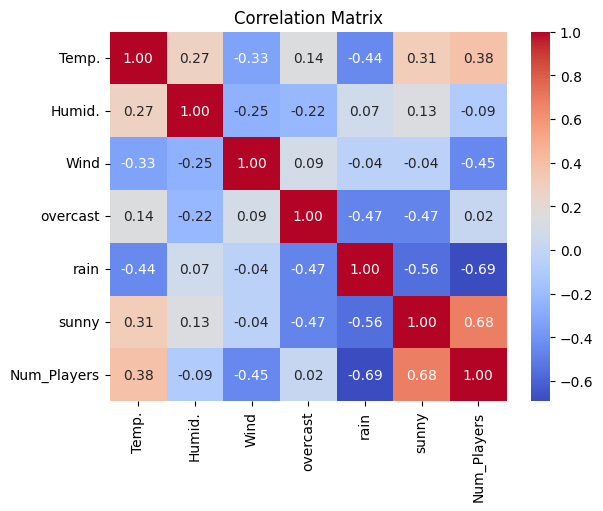

In [2]:
# Correlation matrix for the training set
corr_matrix = X_train.copy()
corr_matrix['Num_Players'] = y_train
correlation = corr_matrix.corr()

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Scatterplot Matrix

To visualize the relationship between features (numerical columns) and check for any clear correlations. This is useful to identify if there's any linear relationship or clustering pattern that could help in predicting the target variable (`Num_Players`).

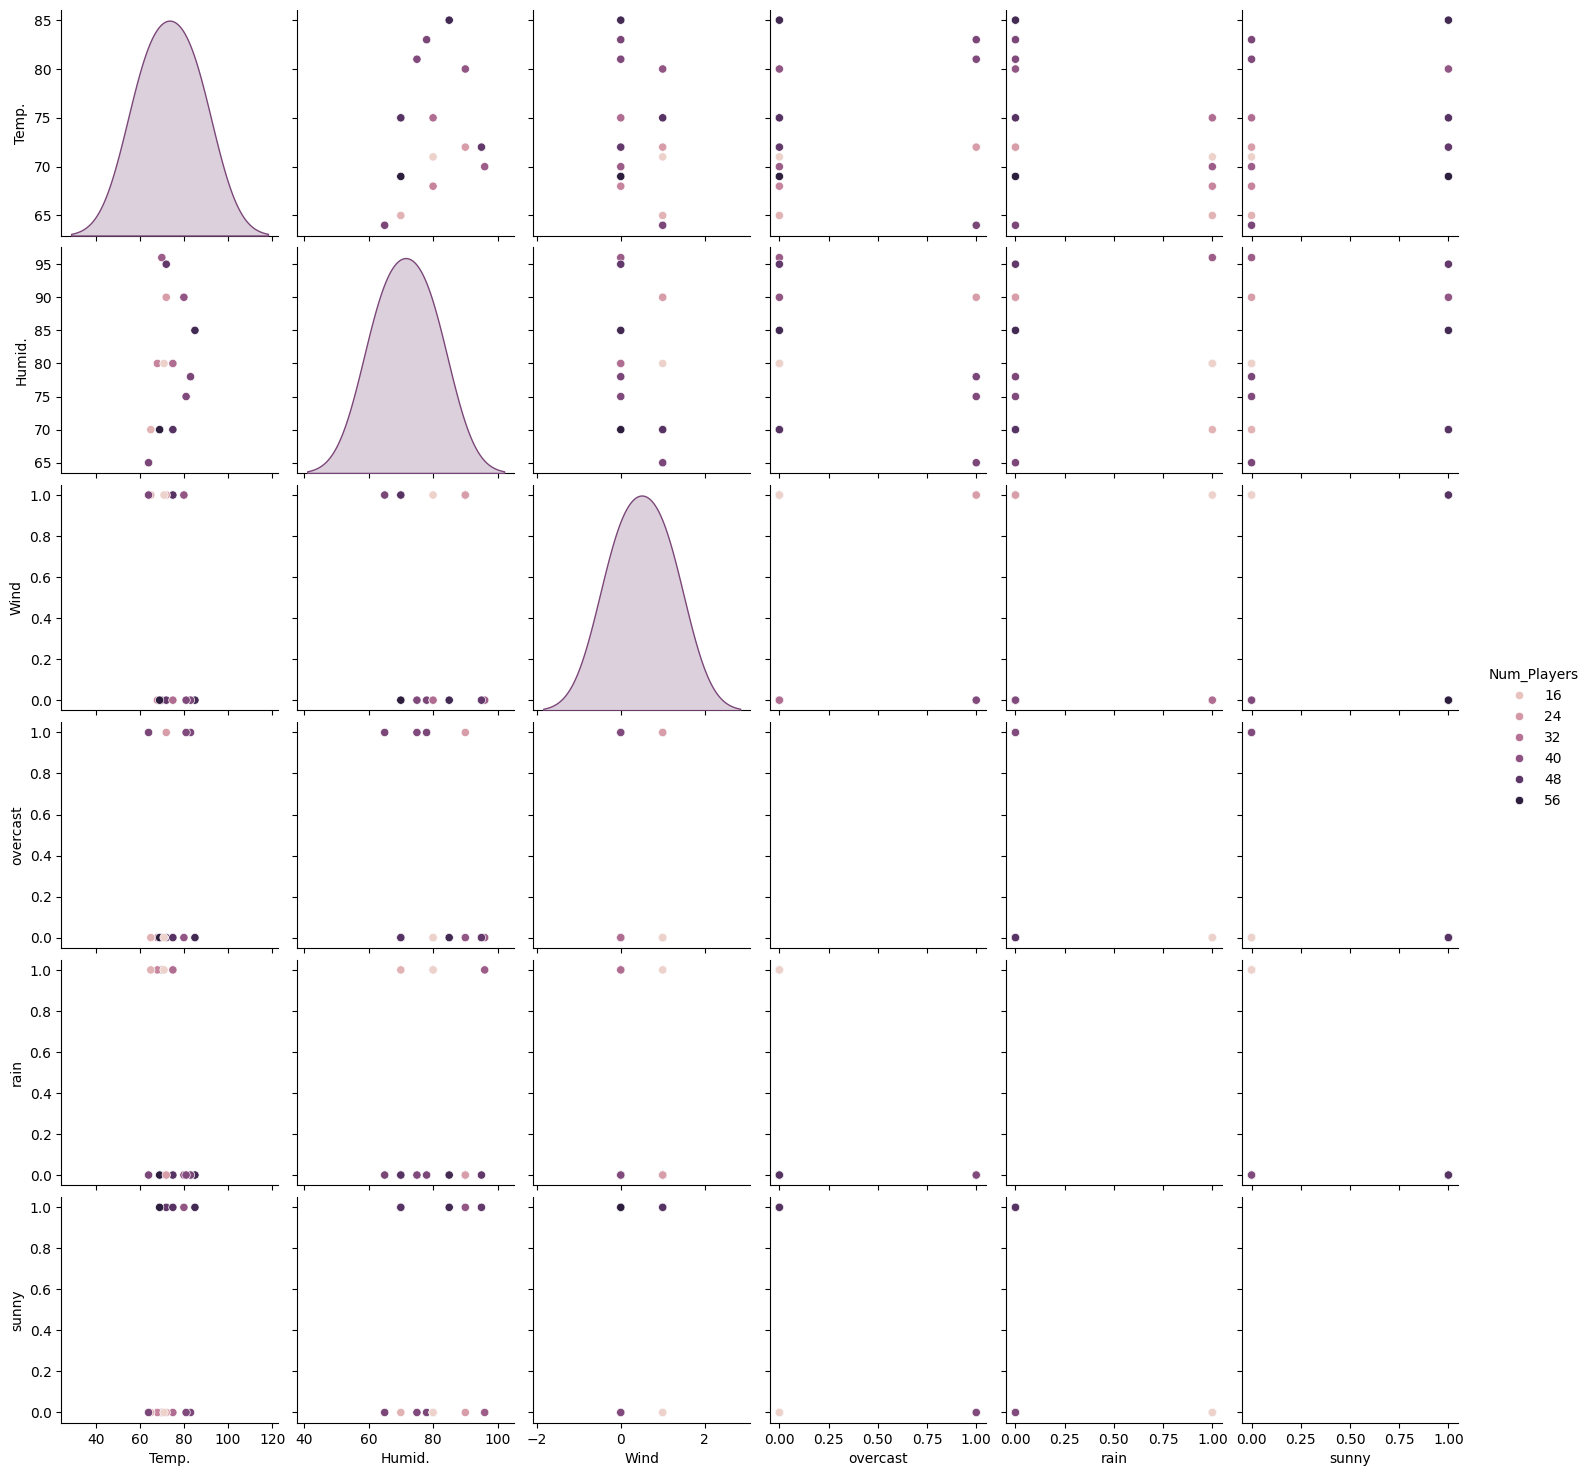

In [3]:
# Combine X_train with y_train to create a complete dataset for visualization
train_data = X_train.copy()
train_data['Num_Players'] = y_train

# Create pairplot
sns.pairplot(train_data, hue='Num_Players', markers='o')
plt.show()

#### Histograms for Feature Distributions

 To see the distribution of numerical features (`Temp.`, `Humid.`) and the target variable (`Num_Players`).

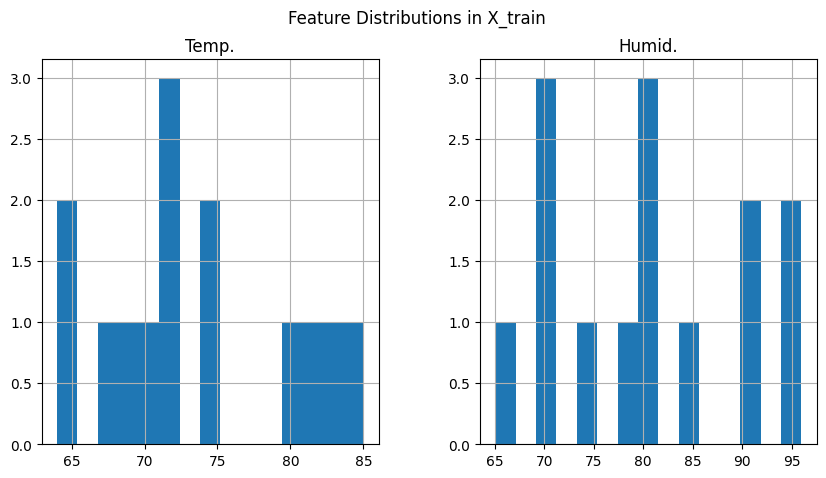

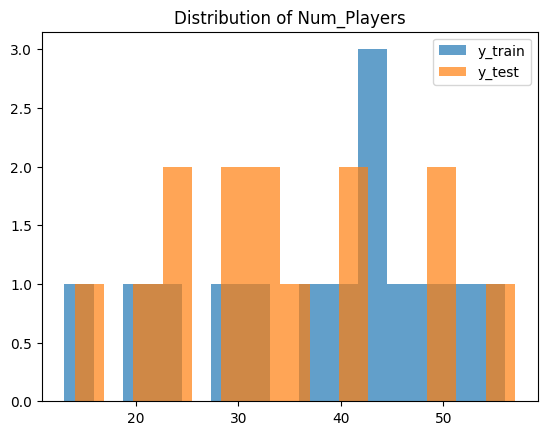

In [4]:
# Histograms for each feature in X_train and y_train
X_train[['Temp.', 'Humid.']].hist(bins=15, figsize=(10, 5), layout=(1, 2))
plt.suptitle("Feature Distributions in X_train")
plt.show()

# Histogram for the target variable 'Num_Players'
plt.hist(y_train, bins=15, alpha=0.7, label='y_train')
plt.hist(y_test, bins=15, alpha=0.7, label='y_test')
plt.legend()
plt.title('Distribution of Num_Players')
plt.show()

#### Scatterplot of `X_train` Features vs `Num_Players`

To visualize how well the features in `X_train` predict `Num_Players`. This can help detect any linear or non-linear relationships.

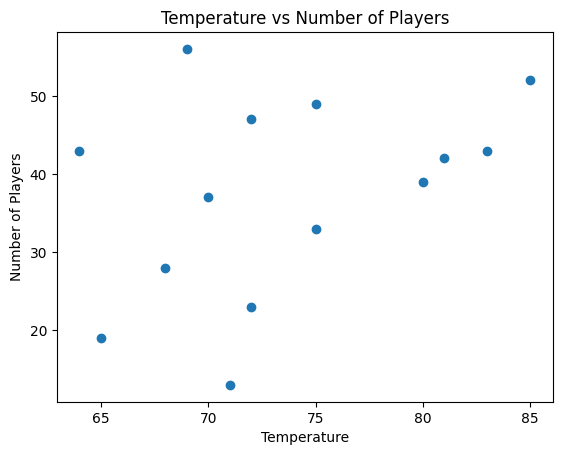

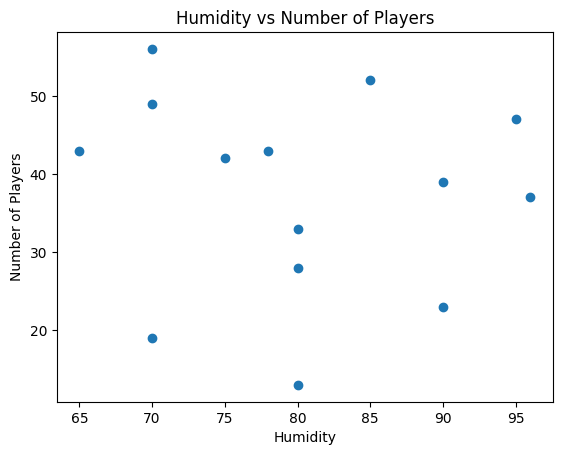

In [5]:
# Scatter plot for Temp. vs Num_Players
plt.scatter(X_train['Temp.'], y_train)
plt.xlabel('Temperature')
plt.ylabel('Number of Players')
plt.title('Temperature vs Number of Players')
plt.show()

# Scatter plot for Humidity vs Num_Players
plt.scatter(X_train['Humid.'], y_train)
plt.xlabel('Humidity')
plt.ylabel('Number of Players')
plt.title('Humidity vs Number of Players')
plt.show()

The **_Decision Tree for Regression_** operates by recursively dividing the data based on features that best reduce prediction error. Here’s the general process:

1. Begin with the entire dataset at the root node.
2. Choose the feature that minimizes a specific error metric (such as mean squared error or variance) to split the data.
3. Create child nodes based on the split, where each child represents a subset of the data aligned with the corresponding feature values.
4. Repeat steps 2–3 for each child node, continuing to split the data until a stopping condition is reached.
5. Assign a final predicted value to each leaf node, typically the average of the target values in that node.

#### Training Steps

1. Begin with all training samples in the root node.

2. For each feature in the dataset:

   a. Sort the feature values in ascending order.

   b. Consider all midpoints between adjacent values as potential split points.

4. For each potential split point:

   a. Calculate the mean squared error (MSE) of the current node.


   b. Compute the weighted average of errors for the resulting split.

5. After evaluating all features and split points, select the one with lowest weighted average of MSE.

6. Create two child nodes based on the chosen feature and split point:


   a. **_Left Child_**: samples with feature value <= split point

   b. **_Right Child_**: samples with feature value > split point

8. Recursively repeat steps 2–5 for each child node. (Continue until a stopping criterion is met.)

9. At each leaf node, assign the average target value of the samples in that node as the prediction.

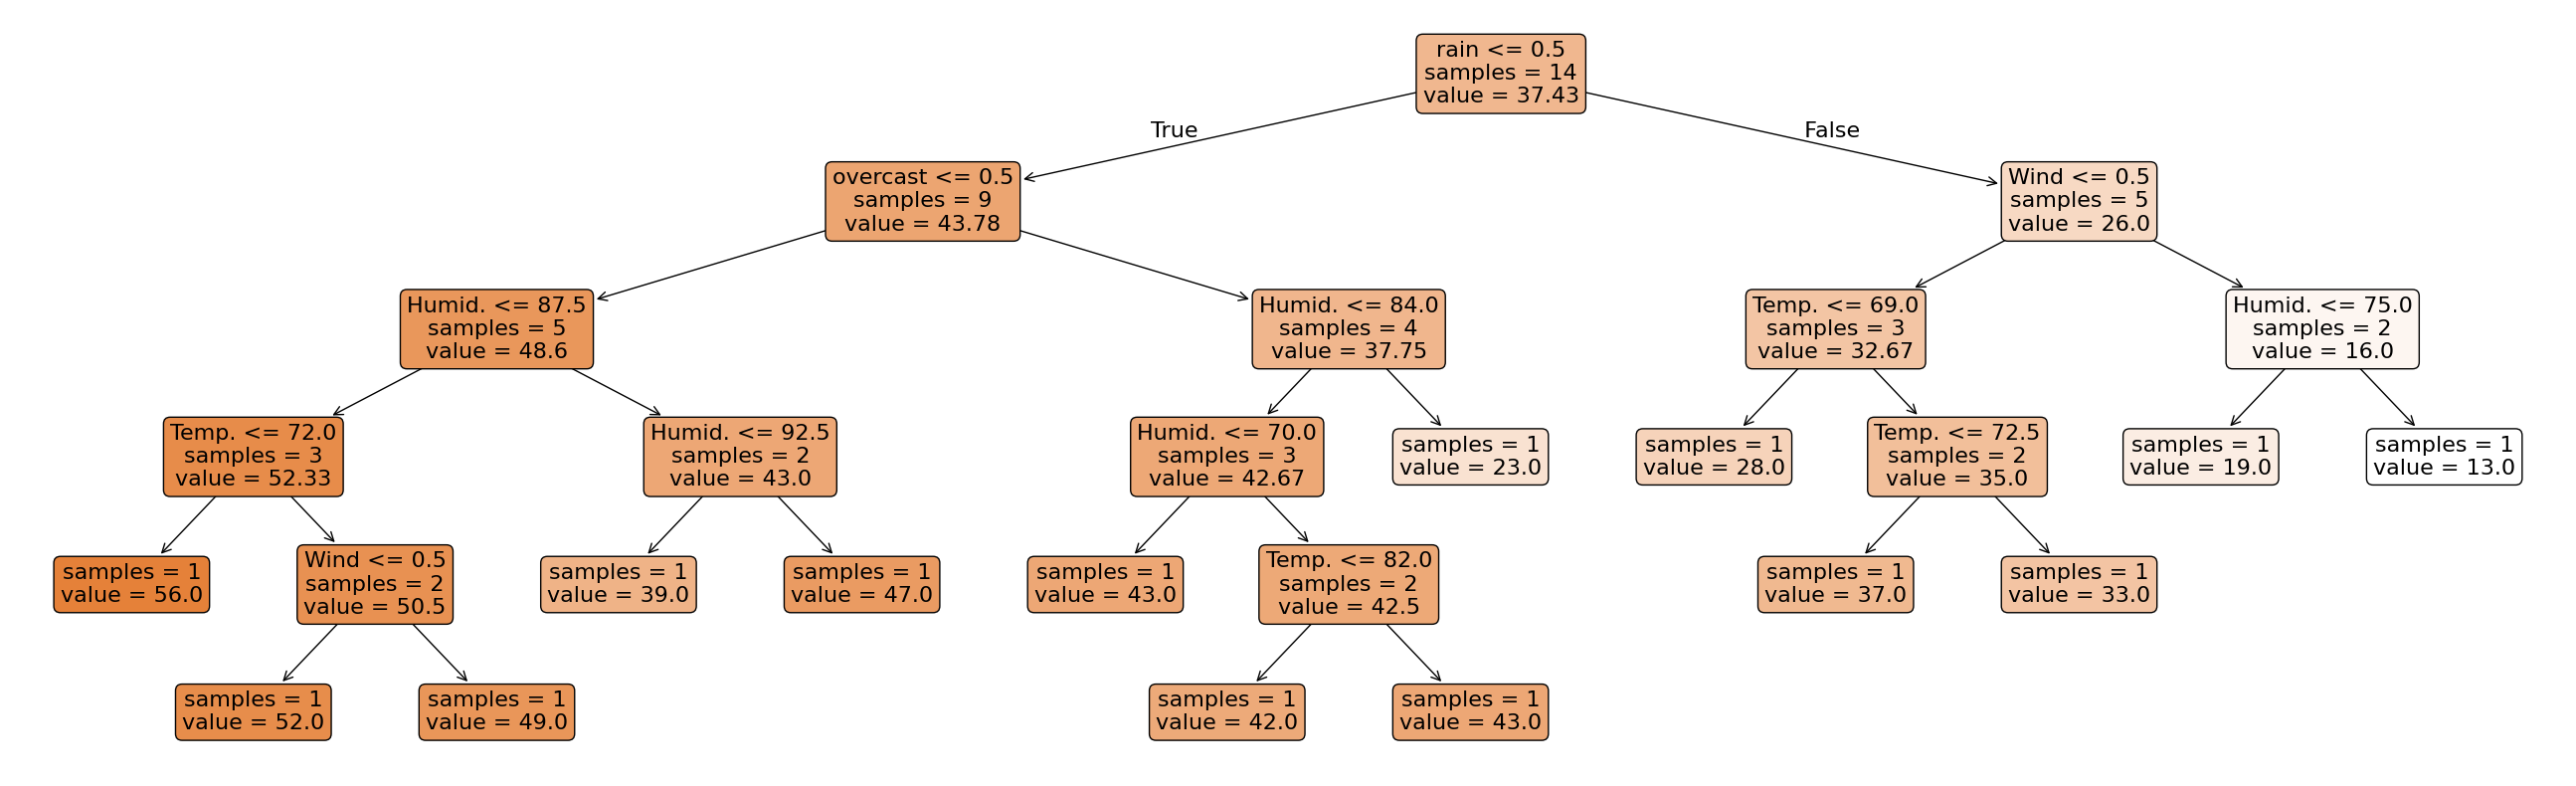

In [6]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt

# Train the model
regr = DecisionTreeRegressor(random_state=42)
regr.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(26,8))
plot_tree(regr, feature_names=X.columns, filled=True, rounded=True, impurity=False, fontsize=16, precision=2)
plt.tight_layout()
plt.show()

### Regression/Prediction Step

Here’s how a regression tree makes predictions for new data:
1. Start at the top (root) of the tree.

2. At each decision point (node):

- Look at the feature and split value.
- If the data point’s feature value is smaller or equal, go left.
- If it’s larger, go right.

3. Keep moving down the tree until you reach the end (a leaf).

4. The prediction is the average value stored in that leaf.

#### Evaluation: Pre-pruning

**_Pre-pruning_**, also known as early stopping, involves halting the growth of a decision tree during the training process based on certain predefined criteria. This approach aims to prevent the tree from becoming too complex and overfitting the training data.

Common pre-pruning techniques include:

1. **Maximum depth**: Limiting how deep the tree can grow.

2. **Minimum samples for split**: Requiring a minimum number of samples to justify splitting a node.

3. **Minimum samples per leaf**: Ensuring each leaf node has at least a certain number of samples.

4. **Maximum number of leaf nodes**: Restricting the total number of leaf nodes in the tree.

5. **Minimum impurity decrease**: Only allowing splits that decrease impurity by a specified amount.


These methods stop the tree’s growth when the specified conditions are met, effectively “pruning” the tree during its construction phase.

#### Evaluation: Post-pruning

**_Post-pruning_**, on the other hand, allows the decision tree to grow to its full extent and then prunes it back to reduce complexity. This approach first builds a complete tree and then removes or collapses branches that don’t significantly contribute to the model’s performance. One common post-pruning technique is called Cost-Complexity Pruning.

#### Cost Complexity Pruning

- **Step 1: Calculate the Impurity for Each Node**

For each interim node, calculate the impurity (MSE for regression case). We then sorted this value from the lowest to highest.

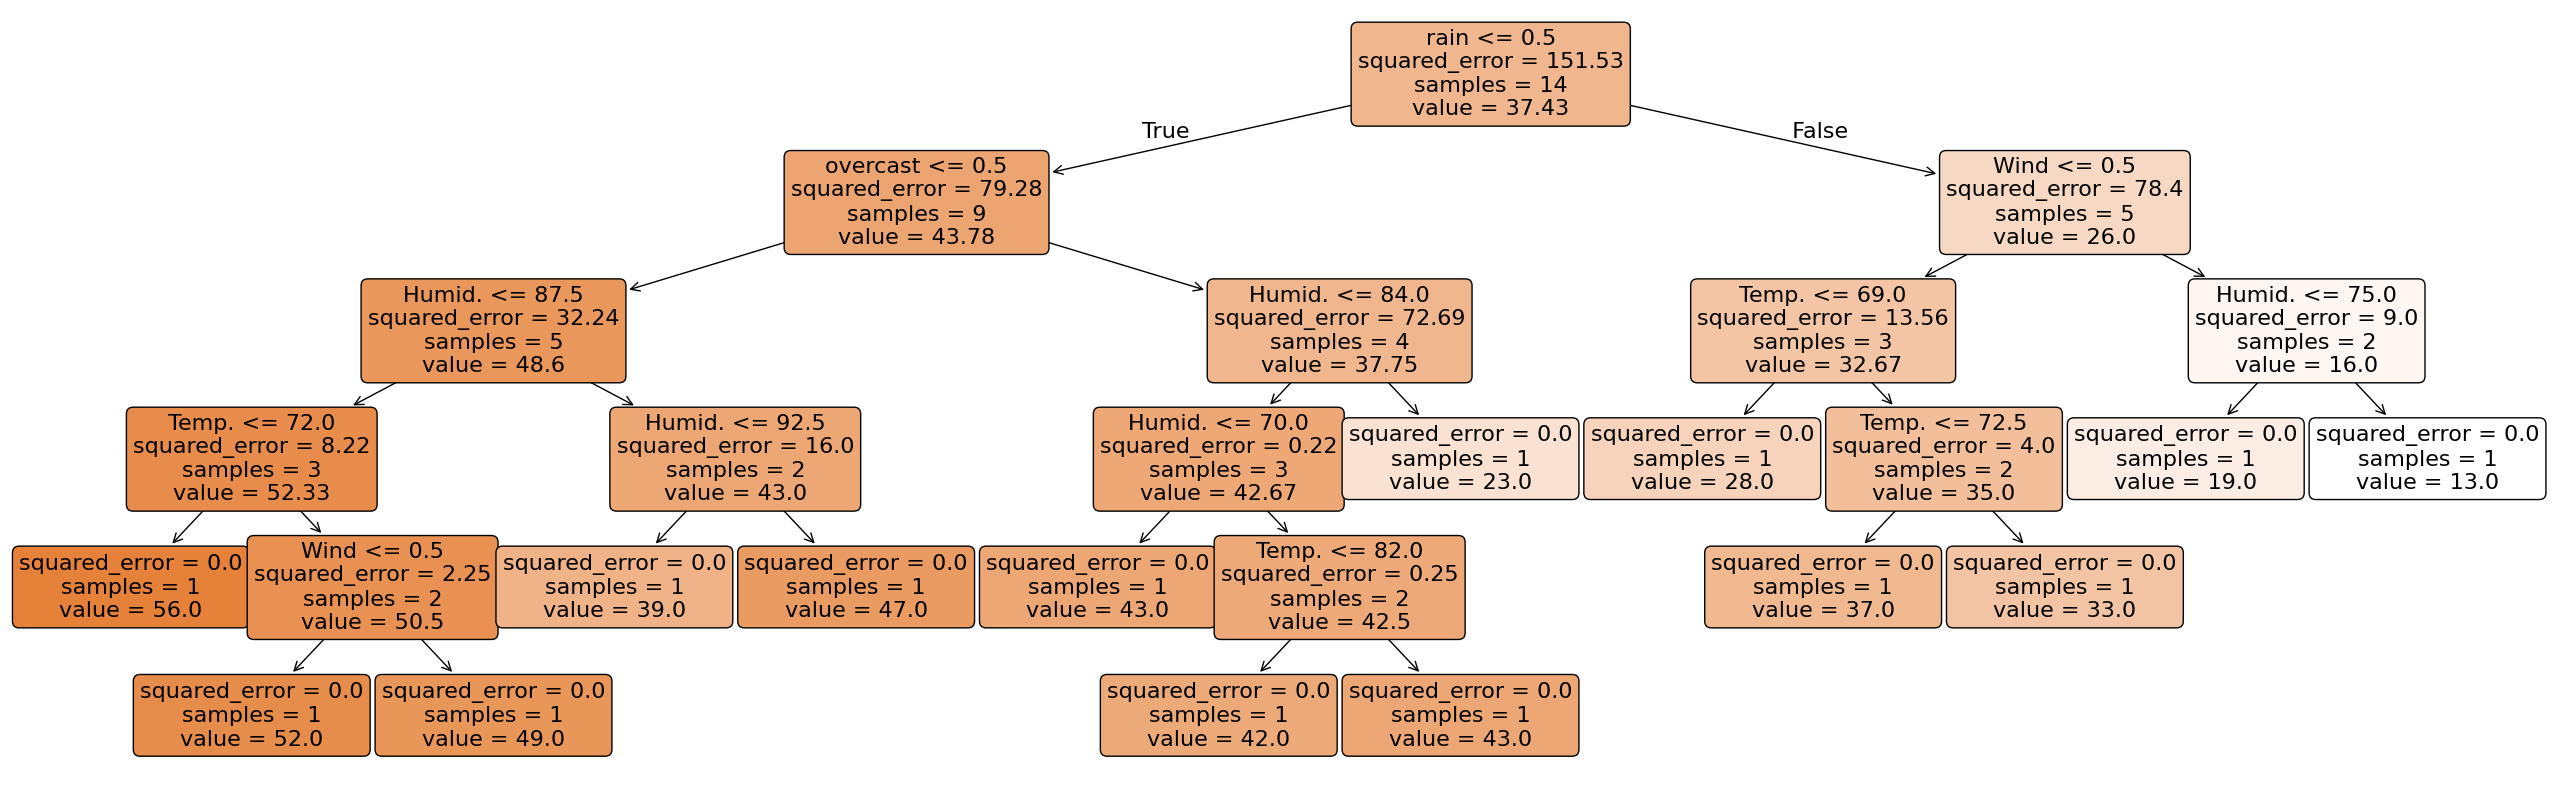

In [7]:
# Visualize the decision tree
plt.figure(figsize=(26,8))
plot_tree(regr, feature_names=X.columns, filled=True, rounded=True, impurity=True, fontsize=16, precision=2)
plt.tight_layout()
plt.show()

- **Step 2: Create Subtrees by Trimming The Weakest Link**

The goal is to gradually turn the interim nodes into leaves starting from the node with the lowest MSE (= weakest link). We can create a path of pruning based on that.

- **Step 3: Calculate Total Leaf Impurities for Each Subtree**

For each subtree T, total leaf impurities (R(T)) can be calculated as:

**_R(T) = (1/N) Σ I(L) * n_L_**

where:

· L ranges over all leaf nodes

· n_L is the number of samples in leaf L

· N is the total number of samples in the tree

· I(L) is the impurity (MSE) of leaf L

- **Step 4: Compute the Cost Function**

To control when to stop turning the interim nodes into leaves, we check the cost complexity first for each subtree T using the following formula:

**_Cost(T) = R(T) + α * |T|_**

where:

· R(T) is the total leaf impurities

· |T| is the number of leaf nodes in the subtree

· α is the complexity parameter

- **Step 5: Select the Alpha**

The value of alpha control which subtree we will end up with. The subtree with the lowest cost will be the final tree.

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Compute the cost-complexity pruning path
tree = DecisionTreeRegressor(random_state=42)
effective_alphas = tree.cost_complexity_pruning_path(X_train, y_train).ccp_alphas
impurities = tree.cost_complexity_pruning_path(X_train, y_train).impurities

# Function to count leaf nodes
count_leaves = lambda tree: sum(tree.tree_.children_left[i] == tree.tree_.children_right[i] == -1 for i in range(tree.tree_.node_count))

# Train trees and count leaves for each complexity parameter
leaf_counts = [count_leaves(DecisionTreeRegressor(random_state=0, ccp_alpha=alpha).fit(X_train_scaled, y_train)) for alpha in effective_alphas]

# Create DataFrame with analysis results
pruning_analysis = pd.DataFrame({
    'total_leaf_impurities': impurities,
    'leaf_count': leaf_counts,
    'cost_function': [f"{imp:.3f} + {leaves}α" for imp, leaves in zip(impurities, leaf_counts)],
    'effective_α': effective_alphas
})

print(pruning_analysis)

    total_leaf_impurities  leaf_count cost_function  effective_α
0                0.000000          14   0.000 + 14α     0.000000
1                0.047619          12   0.048 + 12α     0.023810
2                0.369048          11   0.369 + 11α     0.321429
3                0.940476          10   0.940 + 10α     0.571429
4                2.226190           9    2.226 + 9α     1.285714
5                3.666667           8    3.667 + 8α     1.440476
6                5.952381           7    5.952 + 7α     2.285714
7                8.285714           6    8.286 + 6α     2.333333
8               15.752381           5   15.752 + 5α     7.466667
9               55.158730           3   55.159 + 3α    19.703175
10              78.968254           2   78.968 + 2α    23.809524
11             151.530612           1  151.531 + 1α    72.562358


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Create dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rain', 'rain', 'rain', 'overcast', 'sunny', 'sunny', 'rain', 'sunny', 'overcast', 'overcast', 'rain', 'sunny', 'overcast', 'rain', 'sunny', 'sunny', 'rain', 'overcast', 'rain', 'sunny', 'overcast', 'sunny', 'overcast', 'rain', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0, 72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0, 88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0, 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0, 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True, True, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, False],
    'Num_Players': [52,39,43,37,28,19,43,47,56,33,49,23,42,13,33,29,25,51,41,14,34,29,49,36,57,21,23,41]
}

df = pd.DataFrame(dataset_dict)

# One-hot encode 'Outlook' column
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)

# Convert 'Wind' column to binary
df['Wind'] = df['Wind'].astype(int)

# Split data into features and target, then into training and test sets
X, y = df.drop(columns='Num_Players'), df['Num_Players']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Initialize Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)

# Get the cost complexity path, impurities, and effective alpha
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print("CCP Alphas:\n")
print(ccp_alphas)
print("\nImpurities:\n")
print(impurities)

# Train the final tree with the chosen alpha
final_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=0.1)
final_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_tree.predict(X_test)

# Calculate and print RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")

CCP Alphas:

[0.00000000e+00 2.38095238e-02 3.21428571e-01 5.71428571e-01
 1.28571429e+00 1.44047619e+00 2.28571429e+00 2.33333333e+00
 7.46666667e+00 1.97031746e+01 2.38095238e+01 7.25623583e+01]
Impurities:

[0.00000000e+00 4.76190476e-02 3.69047619e-01 9.40476190e-01
 2.22619048e+00 3.66666667e+00 5.95238095e+00 8.28571429e+00
 1.57523810e+01 5.51587302e+01 7.89682540e+01 1.51530612e+02]
RMSE: 9.2079
